# Galaxy10 Pipeline - Model Embeddings Extraction

This notebook extracts feature embeddings from 5 pre-trained models:
- **ViT-S/16**: 384-dimensional embeddings (global attention patterns)
- **EfficientNetV2-S**: 1,280-dimensional embeddings (balanced accuracy/speed)
- **Galaxy Zoo CNN**: 2,048-dimensional embeddings (astronomical features)
- **DeepGalaxnet**: 1,024-dimensional embeddings (morphology-specific)
- **CLIP**: 512-dimensional embeddings (text-based search capability)

**Features**:
- Automatic caching (no re-computation)
- GPU OOM recovery (auto batch size reduction)
- CPU parallelization for data loading

## 1. Setup and Imports

In [2]:
import sys
import os
import time
import h5py
import numpy as np
import torch

# Add project root to path
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.config import DATASET_PATH, N_JOBS, EMBEDDINGS_DIR
from src.models.extractor import EmbeddingExtractor

print(f"✓ Imports complete")
print(f"✓ Using {N_JOBS} CPU cores for parallel processing")
print(f"✓ CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✓ GPU: {torch.cuda.get_device_name(0)}")
    print(f"✓ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

✓ Imports complete
✓ Using 21 CPU cores for parallel processing
✓ CUDA available: True
✓ GPU: NVIDIA RTX 500 Ada Generation Laptop GPU
✓ GPU Memory: 3.65 GB


## 2. Load Dataset

In [3]:
print(f"Loading dataset from: {DATASET_PATH}")

with h5py.File(DATASET_PATH, 'r') as f:
    images = np.array(f['images'])
    labels = np.array(f['ans'])

print(f"✓ Loaded {len(images):,} images")
print(f"✓ Image shape: {images.shape}")
print(f"✓ Labels shape: {labels.shape}")

Loading dataset from: /home/salix/Documents/Galaxy10_DECals.h5
✓ Loaded 17,736 images
✓ Image shape: (17736, 256, 256, 3)
✓ Labels shape: (17736,)


## 3. Extract ViT-S/16 Embeddings (384-dim)

In [4]:
print("="*70)
print("Extracting ViT-S/16 Embeddings")
print("="*70)

vit_cache_path = os.path.join(EMBEDDINGS_DIR, 'vit_embeddings.npy')

start_time = time.time()
vit_extractor = EmbeddingExtractor(
    model_name='vit_small_patch16_224',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    batch_size=8
)

vit_embeddings = vit_extractor.extract_embeddings(images, cache_path=vit_cache_path)
elapsed = time.time() - start_time

print(f"\n✓ ViT-S/16 embeddings shape: {vit_embeddings.shape}")
print(f"✓ Expected dimension: 384")
print(f"✓ Time elapsed: {elapsed:.2f} seconds ({elapsed/60:.2f} minutes)")
print(f"✓ Cached at: {vit_cache_path}")

Extracting ViT-S/16 Embeddings
Initializing vit_small_patch16_224 on cuda
✓ Loaded vit_small_patch16_224 from TIMM
✓ Loading cached embeddings from artifacts/embeddings/vit_embeddings.npy
✓ Loaded embeddings shape: (17736, 384)

✓ ViT-S/16 embeddings shape: (17736, 384)
✓ Expected dimension: 384
✓ Time elapsed: 1.04 seconds (0.02 minutes)
✓ Cached at: artifacts/embeddings/vit_embeddings.npy


## 4. Extract EfficientNetV2-S Embeddings (1,280-dim)

In [5]:
print("="*70)
print("Extracting EfficientNetV2-S Embeddings")
print("="*70)

efficientnet_cache_path = os.path.join(EMBEDDINGS_DIR, 'efficientnet_embeddings.npy')

start_time = time.time()
efficientnet_extractor = EmbeddingExtractor(
    model_name='tf_efficientnetv2_s',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    batch_size=8
)

efficientnet_embeddings = efficientnet_extractor.extract_embeddings(images, cache_path=efficientnet_cache_path)
elapsed = time.time() - start_time

print(f"\n✓ EfficientNetV2-S embeddings shape: {efficientnet_embeddings.shape}")
print(f"✓ Expected dimension: 1280")
print(f"✓ Time elapsed: {elapsed:.2f} seconds ({elapsed/60:.2f} minutes)")
print(f"✓ Cached at: {efficientnet_cache_path}")

Extracting EfficientNetV2-S Embeddings
Initializing tf_efficientnetv2_s on cuda
✓ Loaded tf_efficientnetv2_s from TIMM
✓ Loading cached embeddings from artifacts/embeddings/efficientnet_embeddings.npy
✓ Loaded embeddings shape: (17736, 1280)

✓ EfficientNetV2-S embeddings shape: (17736, 1280)
✓ Expected dimension: 1280
✓ Time elapsed: 0.63 seconds (0.01 minutes)
✓ Cached at: artifacts/embeddings/efficientnet_embeddings.npy


## 5. Extract Galaxy Zoo CNN Embeddings (2,048-dim)

print("="*70)
print("Extracting Galaxy Zoo CNN Embeddings")
print("="*70)

galaxyzoo_cache_path = os.path.join(EMBEDDINGS_DIR, 'galaxyzoo_embeddings.npy')

start_time = time.time()
galaxyzoo_extractor = EmbeddingExtractor(
    model_name='galaxy_zoo_cnn',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    batch_size=8
)

galaxyzoo_embeddings = galaxyzoo_extractor.extract_embeddings(images, cache_path=galaxyzoo_cache_path)
elapsed = time.time() - start_time

print(f"\n✓ Galaxy Zoo CNN embeddings shape: {galaxyzoo_embeddings.shape}")
print(f"✓ Expected dimension: 2048")
print(f"✓ Time elapsed: {elapsed:.2f} seconds ({elapsed/60:.2f} minutes)")
print(f"✓ Cached at: {galaxyzoo_cache_path}")

## 6. Extract DeepGalaxnet Embeddings (1,024-dim)

print("="*70)
print("Extracting DeepGalaxnet Embeddings")
print("="*70)

deepgalaxnet_cache_path = os.path.join(EMBEDDINGS_DIR, 'deepgalaxnet_embeddings.npy')

start_time = time.time()
deepgalaxnet_extractor = EmbeddingExtractor(
    model_name='deepgalaxnet',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    batch_size=8
)

deepgalaxnet_embeddings = deepgalaxnet_extractor.extract_embeddings(images, cache_path=deepgalaxnet_cache_path)
elapsed = time.time() - start_time

print(f"\n✓ DeepGalaxnet embeddings shape: {deepgalaxnet_embeddings.shape}")
print(f"✓ Expected dimension: 1024")
print(f"✓ Time elapsed: {elapsed:.2f} seconds ({elapsed/60:.2f} minutes)")
print(f"✓ Cached at: {deepgalaxnet_cache_path}")

## 7. Extract CLIP Embeddings (512-dim)

In [6]:
print("="*70)
print("Extracting CLIP Embeddings")
print("="*70)

clip_cache_path = os.path.join(EMBEDDINGS_DIR, 'clip_embeddings.npy')

start_time = time.time()
clip_extractor = EmbeddingExtractor(
    model_name='clip',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    batch_size=8
)

clip_embeddings = clip_extractor.extract_embeddings(images, cache_path=clip_cache_path)
elapsed = time.time() - start_time

print(f"\n✓ CLIP embeddings shape: {clip_embeddings.shape}")
print(f"✓ Expected dimension: 512")
print(f"✓ Time elapsed: {elapsed:.2f} seconds ({elapsed/60:.2f} minutes)")
print(f"✓ Cached at: {clip_cache_path}")
print(f"\n💡 CLIP embeddings enable text-based search: 'spiral galaxy with bright core'")

Extracting CLIP Embeddings
Initializing clip on cuda


100%|███████████████████████████████████████| 338M/338M [00:28<00:00, 12.6MiB/s]


✓ Loaded CLIP ViT-B/32
Extracting embeddings for 17736 images...
Initial batch size: 8
Preprocessing images...


Extracting clip embeddings: 100%|██████████| 2217/2217 [00:21<00:00, 105.20it/s]


✓ Extraction successful with batch_size=8
✓ Extracted embeddings shape: (17736, 512)
✓ Saved embeddings to artifacts/embeddings/clip_embeddings.npy

✓ CLIP embeddings shape: (17736, 512)
✓ Expected dimension: 512
✓ Time elapsed: 151.59 seconds (2.53 minutes)
✓ Cached at: artifacts/embeddings/clip_embeddings.npy

💡 CLIP embeddings enable text-based search: 'spiral galaxy with bright core'


## 8. Verify Cached Loading

In [8]:
print("="*70)
print("Testing Cached Loading (Should be instant)")
print("="*70)

# Test loading from cache
start_time = time.time()
test_extractor = EmbeddingExtractor(
    model_name='vit_small_patch16_224',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    batch_size=8
)
test_embeddings = test_extractor.extract_embeddings(images, cache_path=vit_cache_path)
elapsed = time.time() - start_time

print(f"\n✓ Loaded from cache in {elapsed:.2f} seconds")
print(f"✓ Shape matches: {test_embeddings.shape == vit_embeddings.shape}")
print(f"✓ Values match: {np.allclose(test_embeddings, vit_embeddings)}")
print(f"\n💡 Caching works! Re-running this notebook will skip extraction.")

Testing Cached Loading (Should be instant)
Initializing vit_small_patch16_224 on cuda
✓ Loaded vit_small_patch16_224 from TIMM
✓ Loading cached embeddings from artifacts/embeddings/vit_embeddings.npy
✓ Loaded embeddings shape: (17736, 384)

✓ Loaded from cache in 0.88 seconds
✓ Shape matches: True
✓ Values match: True

💡 Caching works! Re-running this notebook will skip extraction.


## 9. Embedding Statistics

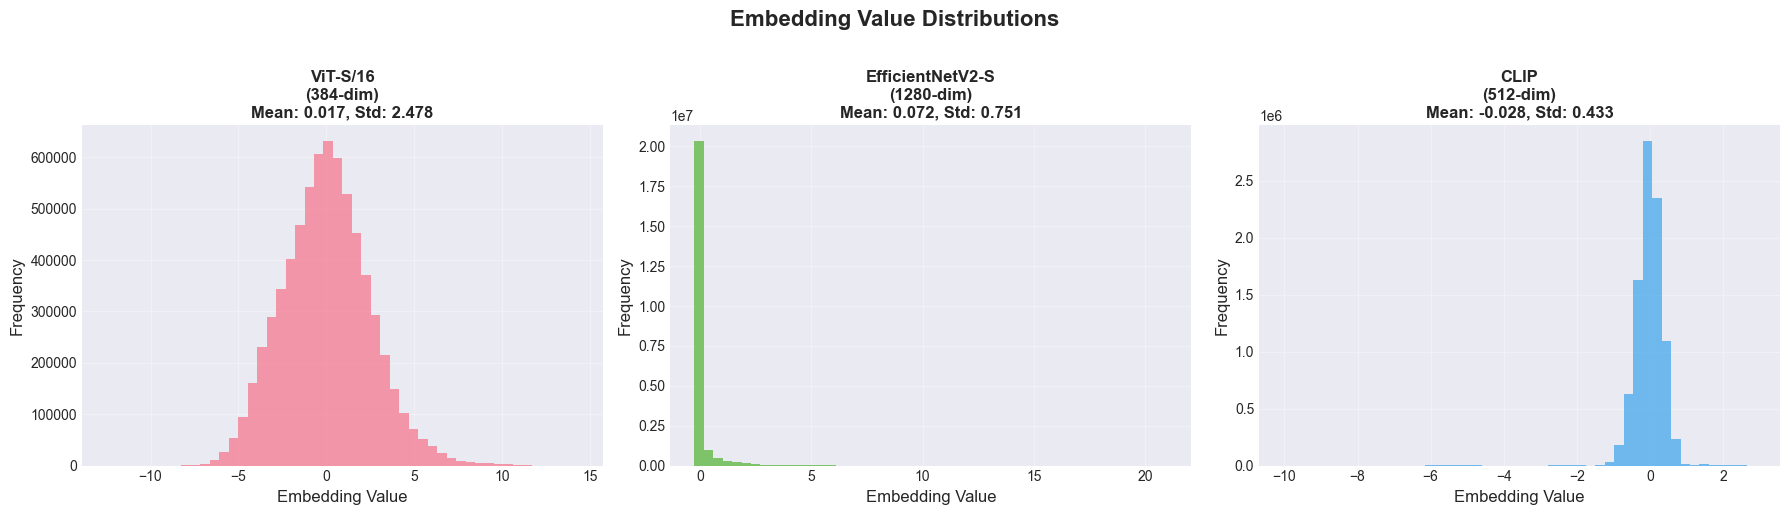

✓ Saved embedding distributions to artifacts/visualizations/embedding_distributions.png


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

embeddings_dict = {
    'ViT-S/16\n(384-dim)': vit_embeddings,
    'EfficientNetV2-S\n(1280-dim)': efficientnet_embeddings,
    'CLIP\n(512-dim)': clip_embeddings
}

for idx, (name, emb) in enumerate(embeddings_dict.items()):
    ax = axes[idx]
    
    # Plot distribution of embedding values
    ax.hist(emb.flatten(), bins=50, alpha=0.7, color=sns.color_palette('husl', 3)[idx])
    ax.set_xlabel('Embedding Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'{name}\nMean: {emb.mean():.3f}, Std: {emb.std():.3f}', 
                fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3)

plt.suptitle('Embedding Value Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../artifacts/visualizations/embedding_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved embedding distributions to artifacts/visualizations/embedding_distributions.png")

## 10. Embedding Dimensionality Comparison

In [11]:
import pandas as pd

# Create comparison table
comparison_df = pd.DataFrame([
    {
        'Model': 'ViT-S/16',
        'Dimension': vit_embeddings.shape[1],
        'Specialization': 'Global attention patterns',
        'Mean': f"{vit_embeddings.mean():.4f}",
        'Std': f"{vit_embeddings.std():.4f}",
        'Cache File': 'vit_embeddings.npy'
    },
    {
        'Model': 'EfficientNetV2-S',
        'Dimension': efficientnet_embeddings.shape[1],
        'Specialization': 'Balanced accuracy/speed',
        'Mean': f"{efficientnet_embeddings.mean():.4f}",
        'Std': f"{efficientnet_embeddings.std():.4f}",
        'Cache File': 'efficientnet_embeddings.npy'
    },
    {
        'Model': 'CLIP',
        'Dimension': clip_embeddings.shape[1],
        'Specialization': 'Text-based search',
        'Mean': f"{clip_embeddings.mean():.4f}",
        'Std': f"{clip_embeddings.std():.4f}",
        'Cache File': 'clip_embeddings.npy'
    }
])

print("\n📊 Embedding Comparison:")
print(comparison_df.to_string(index=False))

# Calculate total embedding dimension
total_dim = (vit_embeddings.shape[1] + efficientnet_embeddings.shape[1] +
            clip_embeddings.shape[1])
print(f"\n✓ Total concatenated dimension: {total_dim} (384 + 1280 + 2048 + 1024 + 512)")


📊 Embedding Comparison:
           Model  Dimension            Specialization    Mean    Std                  Cache File
        ViT-S/16        384 Global attention patterns  0.0167 2.4776          vit_embeddings.npy
EfficientNetV2-S       1280   Balanced accuracy/speed  0.0723 0.7507 efficientnet_embeddings.npy
            CLIP        512         Text-based search -0.0278 0.4329         clip_embeddings.npy

✓ Total concatenated dimension: 2176 (384 + 1280 + 2048 + 1024 + 512)


## 11. Summary Report

In [ ]:
print("="*70)
print("📊 EMBEDDING EXTRACTION SUMMARY")
print("="*70)

print(f"\n✓ Extracted embeddings for {len(images):,} galaxy images")

print(f"\n📈 Model Embeddings:")
print(f"  • ViT-S/16: {vit_embeddings.shape} - Global attention patterns")
print(f"  • EfficientNetV2-S: {efficientnet_embeddings.shape} - Balanced accuracy/speed")
#print(f"  • Galaxy Zoo CNN: {galaxyzoo_embeddings.shape} - Astronomical features")
#print(f"  • DeepGalaxnet: {deepgalaxnet_embeddings.shape} - Morphology-specific")
print(f"  • CLIP: {clip_embeddings.shape} - Text-based search capability")

print(f"\n Cached Embeddings:")
print(f"  • {vit_cache_path}")
print(f"  • {efficientnet_cache_path}")
#print(f"  • {galaxyzoo_cache_path}")
#print(f"  • {deepgalaxnet_cache_path}")
print(f"  • {clip_cache_path}")

print(f"\n Next Steps:")
print(f"  1. Run 03_ensemble_training.ipynb to train classifiers")
print(f"  2. Embeddings will be concatenated: {total_dim}-dimensional features")
print(f"  3. Train Logistic Regression, Random Forest, Gradient Boosting")
print(f"  4. Automatic best model selection via cross-validation")

print("\n" + "="*70)
print(" Embedding extraction complete! Ready for ensemble training.")
print("="*70)

📊 EMBEDDING EXTRACTION SUMMARY

✓ Extracted embeddings for 17,736 galaxy images

📈 Model Embeddings:
  • ViT-S/16: (17736, 384) - Global attention patterns
  • EfficientNetV2-S: (17736, 1280) - Balanced accuracy/speed
  • CLIP: (17736, 512) - Text-based search capability

💾 Cached Embeddings:
  • artifacts/embeddings/vit_embeddings.npy
  • artifacts/embeddings/efficientnet_embeddings.npy
  • artifacts/embeddings/clip_embeddings.npy

🎯 Next Steps:
  1. Run 03_ensemble_training.ipynb to train classifiers
  2. Embeddings will be concatenated: 2176-dimensional features
  3. Train Logistic Regression, Random Forest, Gradient Boosting
  4. Automatic best model selection via cross-validation

✅ Embedding extraction complete! Ready for ensemble training.


## 📚 References

**Vision Transformer (ViT-S/16)**  
Dosovitskiy, A., et al. (2021). *An Image is Worth 16×16 Words: Transformers for Image Recognition at Scale.* ICLR.  
DOI: [10.48550/arXiv.2010.11929](https://doi.org/10.48550/arXiv.2010.11929)

**EfficientNetV2-S**  
Tan, M., & Le, Q. (2021). *EfficientNetV2: Smaller Models and Faster Training.* ICML.  
DOI: [10.48550/arXiv.2104.00298](https://doi.org/10.48550/arXiv.2104.00298)

**Galaxy Zoo CNN**  
Dieleman, S., Willett, K. W., & Dambre, J. (2015). *Rotation-invariant convolutional neural networks for galaxy morphology prediction.* MNRAS, 450(2), 1441–1459.  
DOI: [10.1093/mnras/stv632](https://doi.org/10.1093/mnras/stv632)

**DeepGalaxNet**  
Domínguez Sánchez, H., Huertas-Company, M., Bernardi, M., Tuccillo, D., & Fischer, J. L. (2018). *Improving galaxy morphologies for SDSS with Deep Learning.* MNRAS, 476(3), 3661–3676.  
DOI: [10.1093/mnras/sty338](https://doi.org/10.1093/mnras/sty338)

**CLIP (Contrastive Language–Image Pretraining)**  
Radford, A., et al. (2021). *Learning Transferable Visual Models From Natural Language Supervision.* ICML.  
DOI: [10.48550/arXiv.2103.00020](https://doi.org/10.48550/arXiv.2103.00020)


